Explained variance ratio (2D): [0.12033916 0.09561054]
Cumulative explained variance (2D): 0.21594970500832794


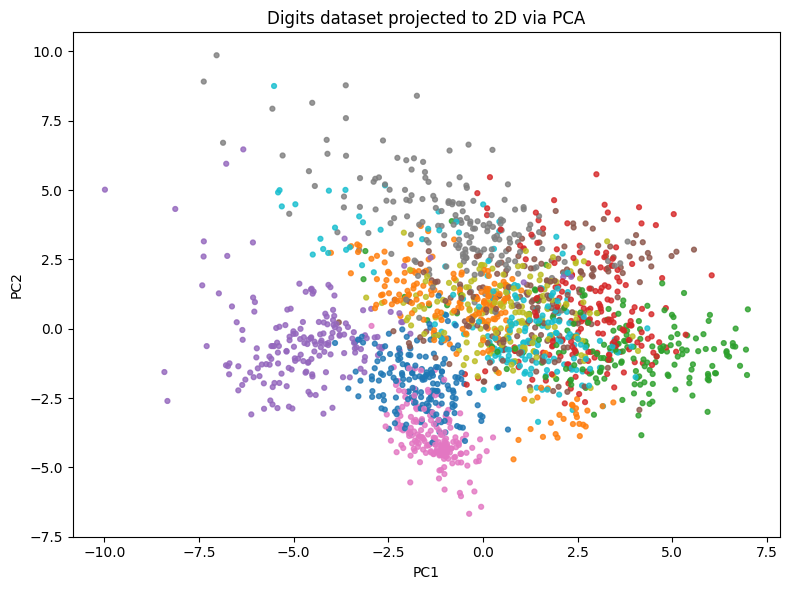

In [2]:
# Imports
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Load a high-dimensional dataset (64 features)
digits = load_digits()
X, y = digits.data, digits.target

# Standardize features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA to 2 components for visualization
pca_2d = PCA(n_components=2, random_state=42)
X_pca_2d = pca_2d.fit_transform(X_scaled)

print("Explained variance ratio (2D):", pca_2d.explained_variance_ratio_)
print("Cumulative explained variance (2D):", pca_2d.explained_variance_ratio_.sum())

# Plot 2D PCA projection colored by digit label
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca_2d[:,0], X_pca_2d[:,1], c=y, cmap='tab10', s=12, alpha=0.8)
plt.title("Digits dataset projected to 2D via PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
legend1 = plt.legend(*scatter.legend_elements(), title="Digits", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().add_artist(legend1)
plt.tight_layout()
plt.show()


Components for 95% variance: 40


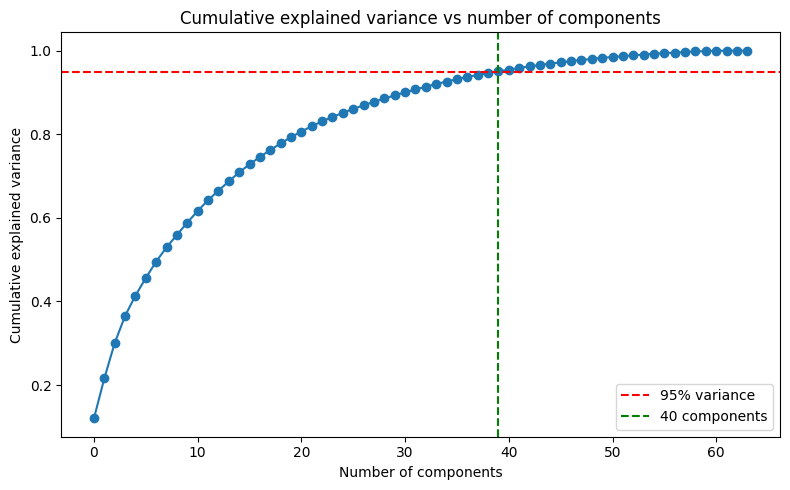

In [3]:
# Explore explained variance vs number of components
pca_full = PCA(n_components=X.shape[1], random_state=42)
pca_full.fit(X_scaled)

cumulative_var = np.cumsum(pca_full.explained_variance_ratio_)
k_95 = np.searchsorted(cumulative_var, 0.95) + 1  # components to reach 95% variance

print("Components for 95% variance:", k_95)

# Plot cumulative explained variance
plt.figure(figsize=(8,5))
plt.plot(cumulative_var, marker='o')
plt.axhline(0.95, color='red', linestyle='--', label='95% variance')
plt.axvline(k_95-1, color='green', linestyle='--', label=f'{k_95} components')
plt.title("Cumulative explained variance vs number of components")
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.legend()
plt.tight_layout()
plt.show()


### Clustering with K-means

Silhouette score (k=4): 0.769


AttributeError: 'KMeans' object has no attribute 'cluster_centers'

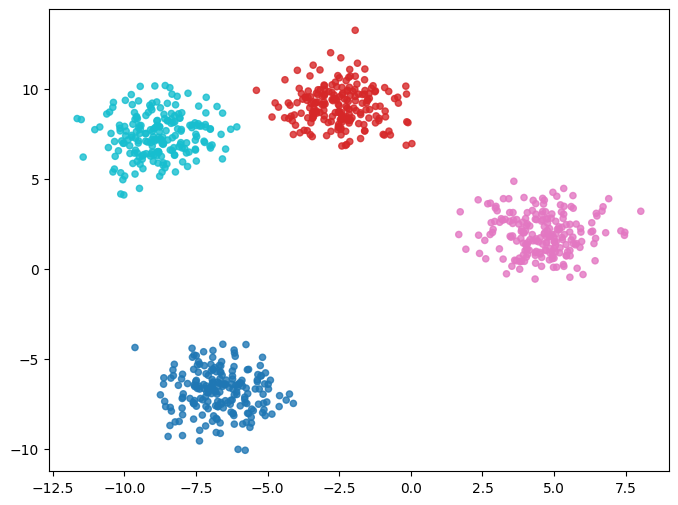

In [4]:
# Imports
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Generate sample data
X_blobs, y_blobs = make_blobs(n_samples=800, centers=4, cluster_std=1.1, random_state=42)

# Fit K-means
k = 4
kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
labels = kmeans.fit_predict(X_blobs)

# Evaluate clustering
sil = silhouette_score(X_blobs, labels)
print(f"Silhouette score (k={k}): {sil:.3f}")

# Visualize clusters and centroids
plt.figure(figsize=(8,6))
plt.scatter(X_blobs[:,0], X_blobs[:,1], c=labels, cmap='tab10', s=20, alpha=0.8)
plt.scatter(kmeans.cluster_centers[:,0], kmeans.cluster_centers[:,1], c='black', s=200, marker='X', label='Centroids')
plt.title(f"K-means clustering (k={k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.tight_layout()
plt.show()


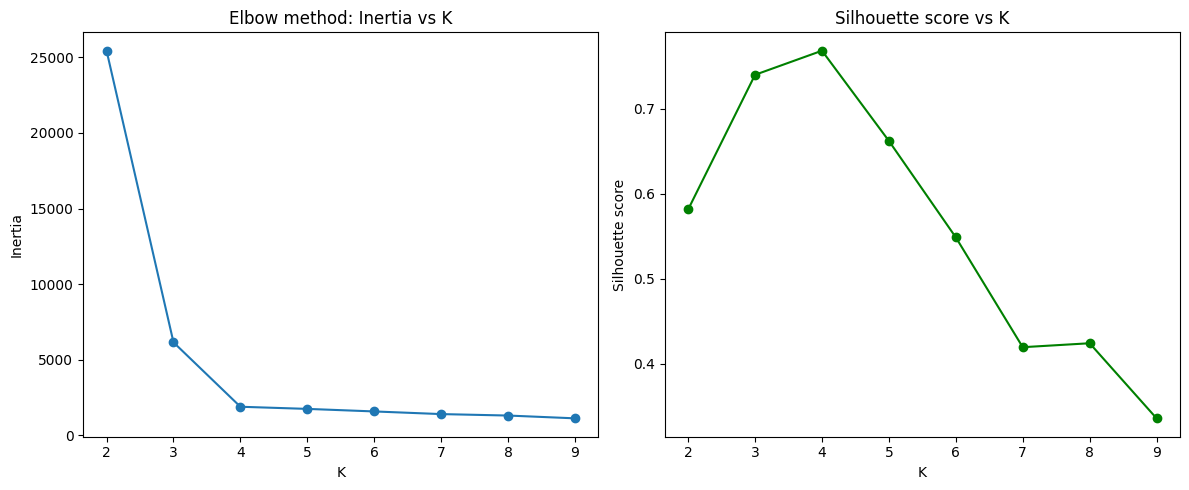

Best K by silhouette: 4


In [5]:
# Elbow method: inertia vs k
ks = range(2, 10)
inertias = []
sils = []

for kk in ks:
    km = KMeans(n_clusters=kk, n_init='auto', random_state=42)
    lbl = km.fit_predict(X_blobs)
    inertias.append(km.inertia_)  # Sum of squared distances within clusters
    sils.append(silhouette_score(X_blobs, lbl))

fig, ax = plt.subplots(1, 2, figsize=(12,5))

# Inertia (Elbow)
ax[0].plot(list(ks), inertias, marker='o')
ax[0].set_title("Elbow method: Inertia vs K")
ax[0].set_xlabel("K")
ax[0].set_ylabel("Inertia")

# Silhouette score
ax[1].plot(list(ks), sils, marker='o', color='green')
ax[1].set_title("Silhouette score vs K")
ax[1].set_xlabel("K")
ax[1].set_ylabel("Silhouette score")

plt.tight_layout()
plt.show()

best_k_by_sil = ks[int(np.argmax(sils))]
print("Best K by silhouette:", best_k_by_sil)
